<a href="https://colab.research.google.com/github/dggasque/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [3]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-10-02 21:41:11--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.176.189
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.176.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  16.5MB/s    in 13s     

2019-10-02 21:41:25 (14.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [4]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [5]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [6]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

Columns needed:


*   Product Name
*   Product Id
*   Number of times ordered

Dataframes needed:


*   order_products__prior
*   order_products__train
*   products





In [0]:
##### YOUR CODE HERE #####
import pandas as pd

In [0]:
order_products__prior = pd.read_csv('order_products__prior.csv')

In [0]:
order_products__train = pd.read_csv('order_products__train.csv')

In [0]:
products = pd.read_csv('products.csv')

In [11]:
order_products = pd.concat([order_products__prior, order_products__train])

order_products.shape

(33819106, 4)

In [12]:
merged = pd.merge(order_products['product_id'], products[['product_id', 'product_name']], how='inner', on = 'product_id')

print(merged.shape)
merged.head()

(33819106, 2)


product_id        product_name
0       33120  Organic Egg Whites
1       33120  Organic Egg Whites
2       33120  Organic Egg Whites
3       33120  Organic Egg Whites
4       33120  Organic Egg Whites

In [13]:
top_10 = ['Banana',
          'Bag of Organic Bananas',
          'Organic Strawberries',
          'Organic Baby Spinach',
          'Organic Hass Avocado',
          'Organic Avocado',
          'Large Lemon',
          'Strawberries',
          'Limes',
          'Organic Whole Milk']

condition = merged['product_name'].isin(top_10)

subset = merged[condition]

print(subset.shape)
subset.head(20)

(2418314, 2)


product_id          product_name
262494       21903  Organic Baby Spinach
262495       21903  Organic Baby Spinach
262496       21903  Organic Baby Spinach
262497       21903  Organic Baby Spinach
262498       21903  Organic Baby Spinach
262499       21903  Organic Baby Spinach
262500       21903  Organic Baby Spinach
262501       21903  Organic Baby Spinach
262502       21903  Organic Baby Spinach
262503       21903  Organic Baby Spinach
262504       21903  Organic Baby Spinach
262505       21903  Organic Baby Spinach
262506       21903  Organic Baby Spinach
262507       21903  Organic Baby Spinach
262508       21903  Organic Baby Spinach
262509       21903  Organic Baby Spinach
262510       21903  Organic Baby Spinach
262511       21903  Organic Baby Spinach
262512       21903  Organic Baby Spinach
262513       21903  Organic Baby Spinach

In [14]:
top_10_counts = pd.DataFrame(subset['product_name'].value_counts())

top_10_counts.reset_index(inplace=True)

top_10_counts.columns = ['product_name', 'purchase_counts']

top_10_counts

product_name  purchase_counts
0                  Banana           491291
1  Bag of Organic Bananas           394930
2    Organic Strawberries           275577
3    Organic Baby Spinach           251705
4    Organic Hass Avocado           220877
5         Organic Avocado           184224
6             Large Lemon           160792
7            Strawberries           149445
8                   Limes           146660
9      Organic Whole Milk           142813

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

In [16]:
table1

treatmenta  treatmentb
John Smith           NaN           2
Jane Doe            16.0          11
Mary Johnson         3.0           1

In [17]:
table2

John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0

In [18]:
table1.columns.to_list()

['treatmenta', 'treatmentb']

In [19]:
table1.index.to_list()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [20]:
table1 = table1.reset_index()
table1

index  treatmenta  treatmentb
0    John Smith         NaN           2
1      Jane Doe        16.0          11
2  Mary Johnson         3.0           1

In [21]:
tidy1 = table1.melt(id_vars ='index', value_vars=['treatmenta', 'treatmentb'])
tidy1

index    variable  value
0    John Smith  treatmenta    NaN
1      Jane Doe  treatmenta   16.0
2  Mary Johnson  treatmenta    3.0
3    John Smith  treatmentb    2.0
4      Jane Doe  treatmentb   11.0
5  Mary Johnson  treatmentb    1.0

In [22]:
tidy1 = tidy1.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
tidy1

name         trt  result
0    John Smith  treatmenta     NaN
1      Jane Doe  treatmenta    16.0
2  Mary Johnson  treatmenta     3.0
3    John Smith  treatmentb     2.0
4      Jane Doe  treatmentb    11.0
5  Mary Johnson  treatmentb     1.0

In [23]:
tidy1.trt = tidy1.trt.str.replace('treatment','')
tidy1

name trt  result
0    John Smith   a     NaN
1      Jane Doe   a    16.0
2  Mary Johnson   a     3.0
3    John Smith   b     2.0
4      Jane Doe   b    11.0
5  Mary Johnson   b     1.0

##Table 2 --> Tidy

In [24]:
table2

John Smith  Jane Doe  Mary Johnson
treatmenta         NaN      16.0           3.0
treatmentb         2.0      11.0           1.0

In [25]:
table2 = table2.reset_index()
table2

index  John Smith  Jane Doe  Mary Johnson
0  treatmenta         NaN      16.0           3.0
1  treatmentb         2.0      11.0           1.0

In [26]:
tidy2 = table2.melt(id_vars='index', value_vars = ['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy2

index      variable  value
0  treatmenta    John Smith    NaN
1  treatmentb    John Smith    2.0
2  treatmenta      Jane Doe   16.0
3  treatmentb      Jane Doe   11.0
4  treatmenta  Mary Johnson    3.0
5  treatmentb  Mary Johnson    1.0

In [27]:
tidy2 = tidy2.rename(columns={
    'index': 'treatment', 
    'variable': 'name', 
    'value': 'result'
})
tidy2

treatment          name  result
0  treatmenta    John Smith     NaN
1  treatmentb    John Smith     2.0
2  treatmenta      Jane Doe    16.0
3  treatmentb      Jane Doe    11.0
4  treatmenta  Mary Johnson     3.0
5  treatmentb  Mary Johnson     1.0

In [28]:
tidy2.treatment = tidy2.treatment.str.replace('treatment','')
tidy2

treatment          name  result
0         a    John Smith     NaN
1         b    John Smith     2.0
2         a      Jane Doe    16.0
3         b      Jane Doe    11.0
4         a  Mary Johnson     3.0
5         b  Mary Johnson     1.0

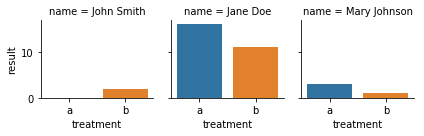

In [29]:
import seaborn as sns
sns.catplot(x='treatment', y='result', col='name', 
            kind='bar', data=tidy2, height=2);

Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

## Subset and Merge

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

In [32]:
products.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [33]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [34]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [35]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])).merge(orders[['order_id', 'order_hour_of_day']])

merged.head()

product_id                product_name  order_id  order_hour_of_day
0           1  Chocolate Sandwich Cookies      1107                 11
1         769      Sliced American Cheese      1107                 11
2        6184                 Clementines      1107                 11
3        8048     Packaged Grape Tomatoes      1107                 11
4        9007              Frosted Flakes      1107                 11

In [36]:
condition = ((merged['product_name']=='Half Baked Frozen Yogurt') | 
             (merged['product_name']=='Half And Half Ultra Pasteurized'))

merged = merged[condition]

print(merged.shape)
merged.head()

(5978, 4)


product_id              product_name  order_id  order_hour_of_day
25086       30668  Half Baked Frozen Yogurt    595220                 21
29409       30668  Half Baked Frozen Yogurt   3252348                 16
33914       30668  Half Baked Frozen Yogurt    677455                 17
34412       30668  Half Baked Frozen Yogurt   1821824                 14
35652       30668  Half Baked Frozen Yogurt   1225489                 17

In [37]:
condition = merged['product_name'].isin(product_names)

subset = merged[condition]

print(subset.shape)
subset.head()

(5978, 4)


product_id              product_name  order_id  order_hour_of_day
25086       30668  Half Baked Frozen Yogurt    595220                 21
29409       30668  Half Baked Frozen Yogurt   3252348                 16
33914       30668  Half Baked Frozen Yogurt    677455                 17
34412       30668  Half Baked Frozen Yogurt   1821824                 14
35652       30668  Half Baked Frozen Yogurt   1225489                 17

## 4 ways to reshape and plot

In [0]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

### 1. value_counts

In [82]:
cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

12    0.149477
13    0.159193
14    0.160688
15    0.165919
16    0.162930
17    0.082960
18    0.041854
19    0.020927
20    0.023916
21    0.017190
22    0.008969
23    0.005979
Name: order_hour_of_day, dtype: float64

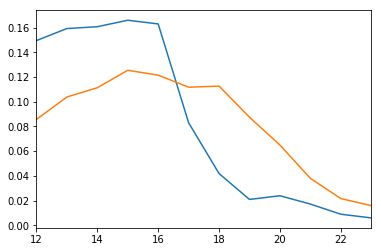

In [83]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

### 2. crosstab

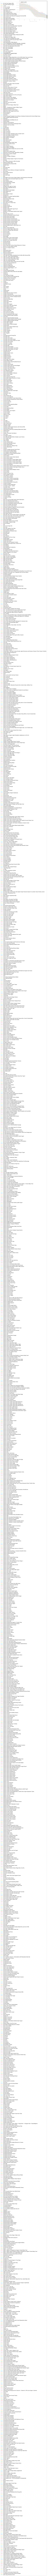

In [84]:
pd.crosstab(subset['order_hour_of_day'],
            subset['product_name'],
            normalize='columns').plot();

### 3. Pivot Table

In [0]:
subset.pivot_table(index='order_hour_of_day',
                   columns='product_name',
                   values='order_id',
                   aggfunc=len).plot();

### 4. melt

In [0]:
table = pd.crosstab(subset['order_hour_of_day'], 
                    subset['product_name'], 
                    normalize=True)

table

In [74]:
table.reset_index().melt(id_vars='order_hour_of_day').rename(columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 })

melted

<bound method DataFrame.reset_index of product_name       0% Fat Free Organic Milk  ...  with Crispy Almonds Cereal
order_hour_of_day                            ...                            
12                                 0.000021  ...                    0.000025
13                                 0.000021  ...                    0.000026
14                                 0.000020  ...                    0.000024
15                                 0.000019  ...                    0.000023
16                                 0.000022  ...                    0.000018
17                                 0.000018  ...                    0.000013
18                                 0.000012  ...                    0.000009
19                                 0.000010  ...                    0.000005
20                                 0.000010  ...                    0.000005
21                                 0.000008  ...                    0.000004
22                                 0.

In [0]:
sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product', 
            data=melted, 
            kind='line');

## Reshape Flight Data

In [0]:
flights = sns.load_dataset('flights')

In [39]:
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [40]:
flights.pivot_table(index='year', columns = 'month', values= 'passengers')

month  January  February  March  April  ...  September  October  November  December
year                                    ...                                        
1949       112       118    132    129  ...        136      119       104       118
1950       115       126    141    135  ...        158      133       114       140
1951       145       150    178    163  ...        184      162       146       166
1952       171       180    193    181  ...        209      191       172       194
1953       196       196    236    235  ...        237      211       180       201
1954       204       188    235    227  ...        259      229       203       229
1955       242       233    267    269  ...        312      274       237       278
1956       284       277    317    313  ...        355      306       271       306
1957       315       301    356    348  ...        404      347       305       336
1958       340       318    362    348  ...        404      359       310       337
1959       360       342    406    396  ...        463      407       362       405
1960       417       391    419    461  ...        508      461       390       432

[12 rows x 12 columns]

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
orders= pd.read_csv('orders.csv')

In [79]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

merged.head()

product_id                product_name  order_id  order_hour_of_day
0           1  Chocolate Sandwich Cookies      1107                 11
1         769      Sliced American Cheese      1107                 11
2        6184                 Clementines      1107                 11
3        8048     Packaged Grape Tomatoes      1107                 11
4        9007              Frosted Flakes      1107                 11

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####
